# Customer Analytics - Group 104
## members: Martin Murata, Andranik Saakyan, Josh Lu
### Problem: <br>
    - binary classification, "will this customer churn (leave for diff service) or not" <br> 
### Constraints: 
    - Because this is a relatively small data set, so you will have to balance creating flexible models with regularization or other forms of complexity control, but will not have to worry too much about computational complexity.
    - We expect you to experiment with at least three (more is good) different types of classification models.  While these can be of the same type as used in homeworks, they must go beyond the scope of the models used in Homework 4

In [431]:
def kaggle_submit(name,yhat):
    # write kaggle predictions out to text file
    Yte = np.vstack((np.arange(Xte.shape[0]), yhat)).T 
    np.savetxt(name,Yte,'%d, %.2f',header='Id,Predicted',comments='',delimiter=',') 

# Load in Data and Libraries

In [69]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier as GBC, GradientBoostingRegressor as GBR, AdaBoostClassifier as ABC, RandomForestClassifier as RFC
from sklearn.neural_network import MLPClassifier as NNC

In [533]:
# whole data set
Xte = np.genfromtxt('data/X_test.txt',delimiter = ',')
X = np.genfromtxt('data/X_train.txt',delimiter = ',')
Y = np.genfromtxt('data/Y_train.txt',delimiter = ',')

# split 75/25 training/validation
Xtr,Xval,Ytr,Yval = ml.splitData(X,Y,.50)

print(f'Shapes:\nX Test: {Xte.shape}\nX Train: {Xtr.shape}\nY Train: {Ytr.shape}\nX validation: {Xval.shape}\nY validation: {Yval.shape}')

Shapes:
X Test: (7422, 107)
X Train: (3712, 107)
Y Train: (3712,)
X validation: (3711, 107)
Y validation: (3711,)


# Visualizing Data in 3 dimensions

compress dimensions for each input type through Principle Component Analysis, graph each against class values, and graph three dimensionally with all 3 features together.

### Standardize data

In [525]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.preprocessing import StandardScaler
Xstandard = StandardScaler().fit_transform(X)

### Reduce Dimensions

In [516]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principleComponents = pca.fit_transform(Xstandard)
print(principleComponents.shape)

(7423, 3)


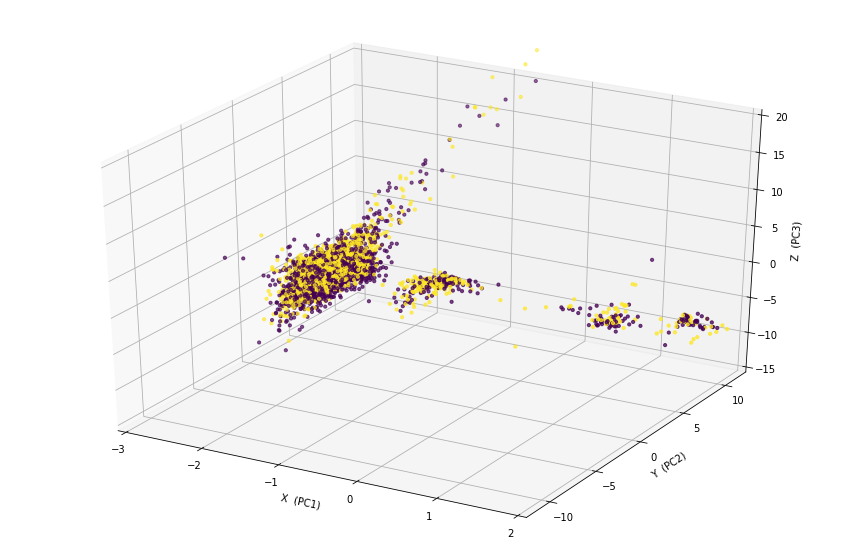

In [517]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
xdata= principleComponents[:,0]
ydata = principleComponents[:,1]
zdata = principleComponents[:,2]
ax.scatter3D(xdata, ydata, zdata,s=10,c = Y);
ax.set_xlabel('X  (PC1)')
ax.set_ylabel('Y  (PC2)')
ax.set_zlabel('Z  (PC3)')
ax.set_xlim3d(-3, 2)
ax.set_ylim3d(-12,12)
ax.set_zlim3d(-15,20)
plt.show()

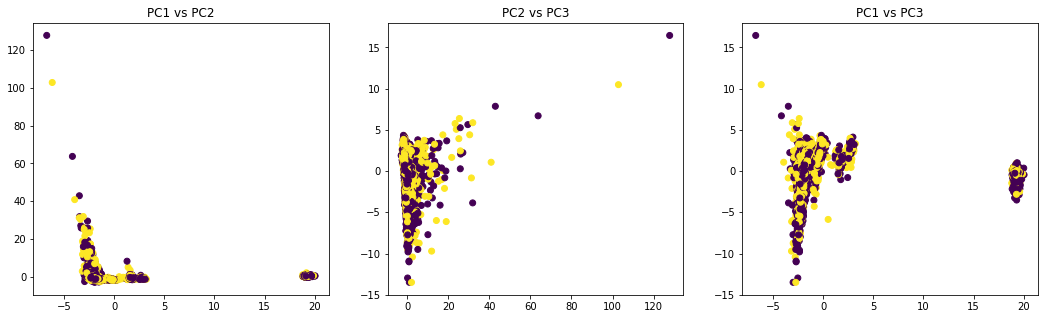

In [473]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].scatter(xdata,ydata,c = Y)
ax[0].set_title('PC1 vs PC2')
ax[1].scatter(ydata,zdata,c = Y)
ax[1].set_title('PC2 vs PC3')
ax[2].scatter(xdata,zdata,c = Y)
ax[2].set_title('PC1 vs PC3')
plt.show()

#  Visualize  in 2 dimensions

(7423, 2)


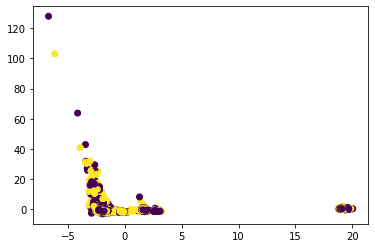

In [479]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principleComponents = pca.fit_transform(Xstandard)
print(principleComponents.shape)
plt.scatter(principleComponents[:,0],principleComponents[:,1],c=Y)
plt.show()

# Adaboost Classifier

In [430]:
adaLearner = ABC(n_estimators=100)
adaLearner.fit(Xtr,Ytr)
scores = cross_val_score(adaLearner, Xval, Yval ,cv=5)
scores.mean()

0.6405310299543265

In [211]:
# write kaggle predictions out to text file
kaggle_submit('Y_submit_abc.txt',clf.predict(Xte))

# Random Forests Classifier

In [507]:
forestLearner = RFC(n_estimators=10, max_depth=30,min_samples_split=5, random_state=0)
forestLearner = forestLearner.fit(X, Y)
scores = cross_val_score(forestLearner, Xval, Yval ,cv=10)
scores.mean()

0.5955366200040576

In [213]:
# write kaggle predictions out to text file
kaggle_submit('Y_submit_rfc.txt',clf.predict(Xte))

# Neural Network Classifier

In [545]:
neuralLearner = NNC(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 9), random_state=1)
neuralLearner.fit(Xtr,Ytr)
MSE(Yval,neuralLearner.predict(Xval))

0.4933980059283212

In [ ]:
# write kaggle predictions out to text file
kaggle_submit('Y_submit_nnc.txt',clf.predict(Xte))

# Gradient Boosting Classification<br>
https://www.youtube.com/watch?v=jxuNLH5dXCs

### Find best 'Max Depth' for individual regression learners 

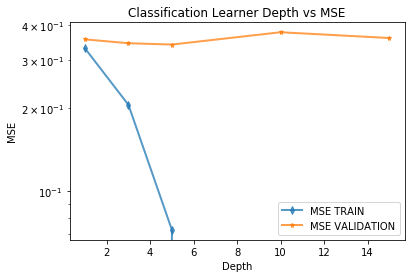

In [518]:
depths = [1,3,5,10,15]
trainMSE = []
validationMSE = []
for d in depths:
    learner = GBC(n_estimators=100, learning_rate=0.1,max_depth=d, random_state=0).fit(Xtr, Ytr)
    validationMSE.append(MSE(Yval,learner.predict(Xval))) 
    trainMSE.append(MSE(Ytr,learner.predict(Xtr)))
plt.semilogy(depths, trainMSE, lw=2, marker='d', markersize=5, alpha=0.75, label='MSE TRAIN')
plt.semilogy(depths, validationMSE, lw=2, marker='*', markersize=5, alpha=0.75, label='MSE VALIDATION')
plt.legend(fontsize=10, loc=0)
plt.title('Classification Learner Depth vs MSE')
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.show()

Optimal Max Depth = 5

In [519]:
optimalLearner = GBC(n_estimators=100, learning_rate=0.1,max_depth=5, random_state=0).fit(Xtr, Ytr)
MSE(Yval,optimalLearner.predict(Xval))

0.34087846941525196

In [21]:
# write kaggle predictions out to text file
kaggle_submit('Y_submit_gbc.txt',optimalLearner.predict(Xte))

# Gradient Boosting Regression

### Find best 'Max Depth' for individual regression learners 

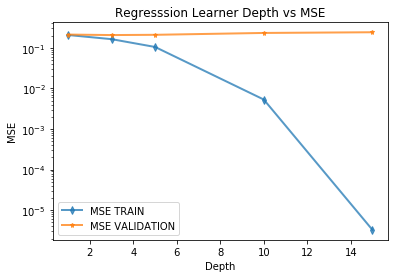

In [490]:
depths = [1,3,5,10,15]
trainMSE = []
validationMSE = []
for d in depths:
    learner = GBR(n_estimators=100, learning_rate=0.1,max_depth=d, random_state=0).fit(Xtr, Ytr)
    validationMSE.append(MSE(Yval,learner.predict(Xval)))
    trainMSE.append(MSE(Ytr,learner.predict(Xtr)))
plt.semilogy(depths, trainMSE, lw=2, marker='d', markersize=5, alpha=0.75, label='MSE TRAIN')
plt.semilogy(depths, validationMSE, lw=2, marker='*', markersize=5, alpha=0.75, label='MSE VALIDATION')
plt.legend(fontsize=10, loc=0)
plt.title('Regresssion Learner Depth vs MSE')
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.show()

Optimal depth at 3

In [523]:
optimalLearner = GBR(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=0).fit(Xtr, Ytr)
MSE(Yval,optimalLearner.predict(Xval))

0.20921391435835077

In [524]:
# write kaggle predictions out to text file
kaggle_submit('Y_submit_gbr.txt',optimalLearner.predict(Xte))

# Märtínikosh Ensemble Classifier 
### M.E.C. attempts to look at the features from different domains individually, treating each of their impacts on the  class prediction as independent of each other
(the name of our ensemble is an ensemble of our names) <br>


In [242]:
from sklearn.svm import SVR
X = np.genfromtxt('data/X_train.txt',delimiter = ',')
Y = np.genfromtxt('data/Y_train.txt',delimiter = ',')

# split 75/25 training/validation
Xtr,Xval,Ytr,Yval = ml.splitData(X,Y,.75)

In [597]:
class martinikosh_ensemble():
    def __init__(self,X):
        #extract real-valued features
        self.XReal  = X[:,:41]
        #extract Discete-valued features
        self.XDiscrete  = X[:,41:69]
        #extract Binary-valued features
        self.XBinary    = X[:,69:107]
        
        self.realLearner = None # trees ?
        self.discreteLearner = None #boost ?
        self.binaryLearner = None #svm, neural networks ? 
        
        self.threshold = .5
        
    def predict(self,Xte):
        Yhat_1 = self.realLearner.predict(Xte[:,:41])
        Yhat_2 = self.discreteLearner.predict(Xte[:,41:69])
        Yhat_3 = self.binaryLearner.predict(Xte[:,69:107])
        
        Yhat = np.stack((Yhat_1,Yhat_2,Yhat_3),axis=1)
        Yhat = np.average(Yhat,axis=1)
        
        for i in range(Yhat.shape[0]):
            Yhat[i] = 1 if Yhat[i] > self.threshold else 0
        return Yhat
    
    def learn(self,Y):
        self.realLearner = RFC(n_estimators=100, max_depth=10,min_samples_split=5, random_state=0).fit(self.XReal,Y)
        self.discreteLearner = GBR(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=0).fit(self.XDiscrete, Y)
        self.binaryLearner = NNC(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=0).fit(self.XBinary,Y)    

In [598]:
mec = martinikosh_ensemble(Xtr)
mec.learn(Ytr)
MSE(Yval,mec.predict(Xval))

0.3939638911344651

In [249]:
# write kaggle predictions out to text file
kaggle_submit('Y_submit_mec.txt',mec.predict(Xte))